# Climatology calculations

In [1]:
# Imports
from earthkit import transforms as ekt
from earthkit import data as ekd
from earthkit.data.testing import earthkit_remote_test_data_file
ekd.settings.set("cache-policy", "user")

## Load some test data

In this example we will use hourly ERA5 2m temperature data on a 0.5x0.5 spatial grid for the year 2015 as
our physical data; and we will use the NUTS geometries which are stored in a geojson file.

All `earthkit-transforms` methods can be called with `earthkit-data` objects (Readers and Wrappers) or with a pre-loaded `xarray`. To reduce the number of conversions in the example, we will convert to xarray in the first cell and use that data object for all subsequent steps.

In [2]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_era5_file = earthkit_remote_test_data_file("test-data", "era5_temperature_france_2015_2016_2017_3deg.grib")
era5_data = ekd.from_source("url", remote_era5_file)

# convert to xarray to save repeated conversion in further steps
era5_xr = era5_data.to_xarray(time_dim_mode="valid_time")
era5_xr

era5_temperature_france_2015_2016_2017_3deg.grib:   0%|          | 0.00/109k [00:00<?, ?B/s]

era5_temperature_france_2015_2016_2017_3deg.grib: 100%|██████████| 109k/109k [00:01<00:00, 86.6kB/s]

<xarray.Dataset> Size: 217kB
Dimensions:     (valid_time: 542, latitude: 7, longitude: 7)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 2015-01-01 ... 2017-03-31T12:...
  * latitude    (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude   (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
Data variables:
    2t          (valid_time, latitude, longitude) float64 212kB ...
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

## Calculate the climatologies of the ERA5 data

Monthly mean

In [3]:
climatology_monthly_mean = ekt.climatology.monthly_mean(era5_xr)
# # The following line would also work, but we have already converted the data to xarray,
# #  so do not need to do it again.
# climatology = ek_aggregate.climatology.monthly_mean(era5_xr)
climatology_monthly_mean

<xarray.Dataset> Size: 1kB
Dimensions:    (month: 3, latitude: 7, longitude: 7)
Coordinates:
  * latitude   (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude  (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * month      (month) int64 24B 1 2 3
Data variables:
    2t         (month, latitude, longitude) float64 1kB 278.2 276.9 ... 290.1
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

Climatology of the daily mean:

In [4]:
climatology_daily_mean = ekt.climatology.daily_mean(era5_xr)
climatology_daily_mean

<xarray.Dataset> Size: 37kB
Dimensions:    (dayofyear: 91, latitude: 7, longitude: 7)
Coordinates:
  * latitude   (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude  (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * dayofyear  (dayofyear) int64 728B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
Data variables:
    2t         (dayofyear, latitude, longitude) float64 36kB 274.9 ... 292.7
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

Repeat for the monthly maximum, minimum  and standard deviation

In [5]:
clim_max = ekt.climatology.monthly_max(era5_xr)
clim_min = ekt.climatology.monthly_min(era5_xr)
clim_std = ekt.climatology.monthly_std(era5_xr)
clim_std

<xarray.Dataset> Size: 1kB
Dimensions:    (month: 3, latitude: 7, longitude: 7)
Coordinates:
  * latitude   (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude  (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * month      (month) int64 24B 1 2 3
Data variables:
    2t         (month, latitude, longitude) float64 1kB 4.165 4.475 ... 5.735
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

### Quantiles

Please note the api for quantiles is slightly different, it requires an additional argument `q` which is a list of the quantiles to return.

Additionally, the returned object has `quantiles` dimension which is for each of the quantiles returned.

In [6]:
quantiles = ekt.climatology.quantiles(era5_xr, [0.1, 0.5, 0.9], frequency='month')
quantiles

<xarray.Dataset> Size: 4kB
Dimensions:    (quantile: 3, month: 3, latitude: 7, longitude: 7)
Coordinates:
  * latitude   (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude  (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * quantile   (quantile) float64 24B 0.1 0.5 0.9
  * month      (month) int64 24B 1 2 3
Data variables:
    2t         (quantile, month, latitude, longitude) float64 4kB dask.array<chunksize=(1, 1, 7, 7), meta=np.ndarray>

## Plot the output for a random location

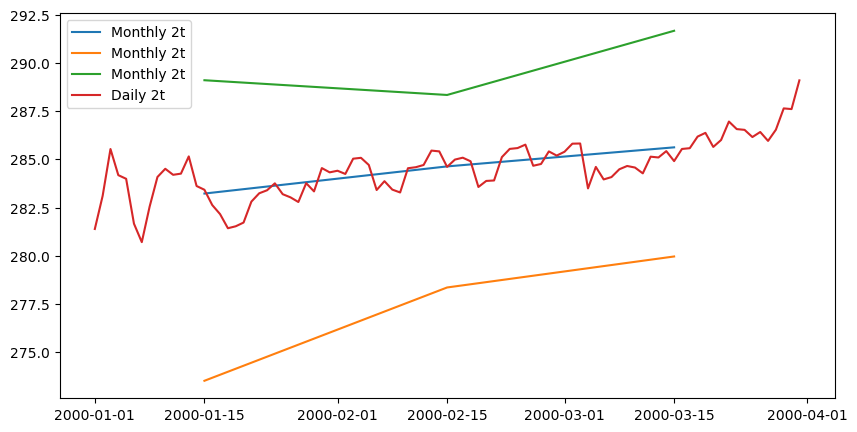

In [7]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xarray as xr
isel_kwargs = {"latitude":2, "longitude":4}

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for data in [climatology_monthly_mean, clim_min, clim_max]:
    var_name = list(data.data_vars.keys())[0]
    c_point = data[var_name].isel(**isel_kwargs)
    c_time = [datetime(2000,i,15) for i in c_point.month.values]
    ax.plot(c_time, c_point.values.flat, label=f'Monthly {var_name}')


data = climatology_daily_mean
var_name = list(data.data_vars.keys())[0]
c_point = data[var_name].isel(**isel_kwargs)
c_time = [datetime(2000,1,1)+timedelta(days=int(i-1)) for i in c_point.dayofyear.values]
ax.plot(c_time, c_point.values.flat, label=f'Daily {var_name}')

ax.legend()
